In [2]:
import pandas as pd

# Load your CSV files
train_set = pd.read_csv('D:/Python_e/wine_quality_classification/train_set.csv')  # Replace 'train_set.csv' with the actual path
test_set = pd.read_csv('D:/Python_e/wine_quality_classification/test_set.csv')    # Replace 'test_set.csv' with the actual path

# Separate features (X) and target variable (y)
X_train = train_set.drop(['quality', 'class'], axis=1)  # Adjust column names if needed
y_train = train_set['class']

X_test = test_set.drop(['quality', 'class'], axis=1)    # Adjust column names if needed
y_test = test_set['class']

           Classifier  Accuracy  Precision    Recall   ROC AUC
0        RandomForest  0.809375   0.835366  0.801170  0.809981
1    GradientBoosting  0.787500   0.828025  0.760234  0.789513
2                 SVM  0.762500   0.814570  0.719298  0.765689
3  LogisticRegression  0.740625   0.768293  0.736842  0.740904
4          KNeighbors  0.740625   0.758824  0.754386  0.739609
5          GaussianNB  0.721875   0.773333  0.678363  0.725087
6        DecisionTree  0.756250   0.775148  0.766082  0.755524


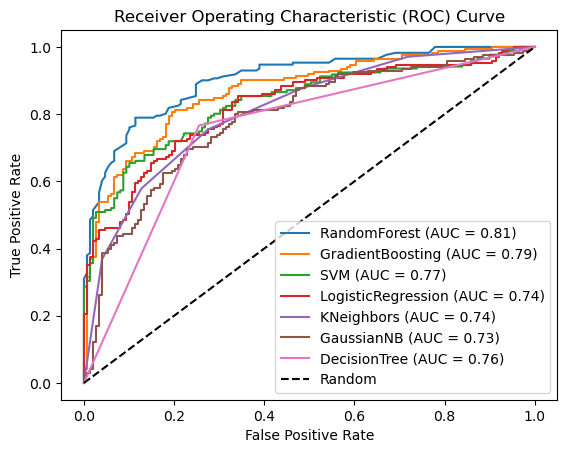

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import joblib  # Updated import statement
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a pipeline with a StandardScaler and a classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())  # Change this to the algorithm you want to start with
])

# Step 2: Define a list of classifiers to compare
classifiers = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('SVM', SVC(probability=True)),
    ('LogisticRegression', LogisticRegression()),
    ('KNeighbors', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB()),
    ('DecisionTree', DecisionTreeClassifier())
    # Add more classifiers as needed
]

# Step 3: Cross-validation and evaluation
results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'ROC AUC': []}

for name, classifier in classifiers:
    pipeline.set_params(classifier=classifier)
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Fit the pipeline on the entire training set
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Save results
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['ROC AUC'].append(roc_auc)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Display numerical results
results_df = pd.DataFrame(results)
print(results_df)

# Display ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [9]:
# Step 4: Fine-tune hyperparameters of the best-performing algorithm
best_classifier = classifiers[results_df['Accuracy'].idxmax()][1]
print(best_classifier)

RandomForestClassifier()


In [11]:
param_grid = {
    'classifier__max_depth': [None, 10, 20],      # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]     # Minimum samples required to be at a leaf node
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [12]:
print(best_params)

{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


Accuracy: 0.8156
Precision: 0.8415
Recall: 0.8070
ROC AUC: 0.8163


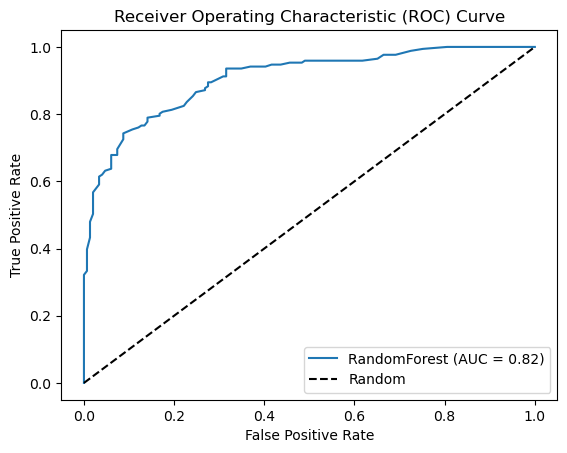

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a RandomForest classifier with specific parameters
rf_classifier = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2
)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [14]:
import joblib

# Save the trained RandomForest model to a file
joblib.dump(rf_classifier, 'D:/Python_e/wine_quality_classification/trained_model.joblib')

['D:/Python_e/wine_quality_classification/trained_model.joblib']